In [1]:
#data preprocessing
import pandas as pd

%matplotlib inline

# Load Data

In [2]:
import pandas as pd
# Read data
data_dir = './dataset/'
data = pd.read_csv(data_dir + 'final_dataset.csv')

In [3]:
# Remove first 3 matchweeks
data = data[data.MW > 3]

In [4]:
# Store matchweek # 4 fixtures for prediction
mw_4 = data[-10:][['HomeTeam', 'AwayTeam']]
mw_4

,HomeTeam,AwayTeam
6490,Man City,Liverpool
6491,Arsenal,Bournemouth
6492,Brighton,West Brom
6493,Everton,Tottenham
6494,Leicester,Chelsea
6495,Southampton,Watford
6496,Stoke,Man United
6497,Burnley,Crystal Palace
6498,Swansea,Newcastle
6499,West Ham,Huddersfield


In [5]:
# Select labels & features 
# FTR - Full time result
# HTGD - Home team goal difference
# ATGD - away team goal difference
# HTP - Home team points
# ATP - Away team points
# HM1, HM2, HM3 - Home team past-match form
# AM1, MM2, AM3 - Away team past-match form
# DiffFormPts Diff in points
# DiffLP - Differnece in last years prediction

features_labels = data[['FTR', 'HTGD','ATGD','HTP','ATP','HM1', 'HM2', 'HM3', 
                        'AM1', 'AM2', 'AM3','DiffFormPts','DiffLP']]
features_labels.tail()

,FTR,HTGD,ATGD,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,DiffFormPts,DiffLP
6495,NaN,0.25,0.5,1.25,1.25,D,W,D,D,W,D,0.00,-9.0
6496,NaN,0.00,2.5,1.00,2.25,D,W,L,W,W,W,-1.25,7.0
6497,NaN,0.00,-1.5,1.00,0.00,D,L,W,L,L,L,1.00,2.0
6498,NaN,-0.50,0.0,1.00,0.75,W,L,D,W,L,L,0.25,-3.0
6499,NaN,-2.00,1.0,0.00,1.75,L,L,L,D,W,W,-1.75,-7.0


# Visualising Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6584ee6e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f65824aa358>]], dtype=object)

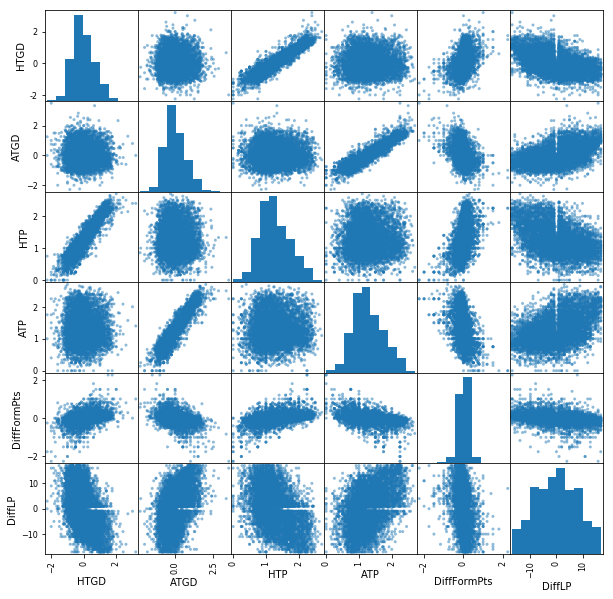

In [6]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

scatter_matrix(features_labels[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10), grid=True)

# Prepare features for Train and Test set

In [7]:
# Separate into feature set and target variable
# FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = features_labels.drop(['FTR'],1)
y_all = features_labels['FTR']

In [8]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
X_all.tail()

,HTGD,ATGD,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,...,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,DiffFormPts,DiffLP
6495,0.25,0.5,1.25,1.25,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0.00,-9.0
6496,0.00,2.5,1.00,2.25,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,-1.25,7.0
6497,0.00,-1.5,1.00,0.00,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1.00,2.0
6498,-0.50,0.0,1.00,0.75,0,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0.25,-3.0
6499,-2.00,1.0,0.00,1.75,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,-1.75,-7.0


In [9]:
# Seperate data in to train (2000/01-2015/16), test (2016/17), predict set (2017/18)
X_train = X_all[:5600]
y_train = y_all[:5600]
X_test = X_all[5600:5950]
y_test = y_all[5600:5950]
X_predict = X_all[5950:]

In [10]:
X_train.head()

,HTGD,ATGD,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,...,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,DiffFormPts,DiffLP
30,0.50,0.25,1.25,1.00,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0.25,-16.0
31,-0.50,-0.75,0.75,0.25,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0.50,-2.0
32,0.00,0.25,1.00,1.00,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0.00,-3.0
33,-0.25,-0.25,0.75,0.50,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0.25,3.0
34,0.00,0.75,1.00,1.50,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,-0.50,3.0


In [11]:
# Standardising the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mask = ('HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP')
X_train.loc[:, mask] = scaler.fit_transform(X_train.loc[:, mask])
X_test.loc[:, mask] = scaler.transform(X_test.loc[:, mask])
X_predict.loc[:, mask] = scaler.transform(X_predict.loc[:, mask])

/home/morn/ml/.tf/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
scaler.mean_

array([-0.00557951,  0.01183727,  1.27035411,  1.28212978, -0.01116522,
        0.00285714])

# Modeling

Create utility function for training and testing models

In [13]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, average='macro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [14]:
#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
import xgboost as xgb
#the outcome (dependent variable) has only a limited number of possible values. 
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression
#A random forest is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
from sklearn.svm import SVC

/home/morn/ml/.tf/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')

Training a LogisticRegression using a training set size of 5600. . .
Trained model in 0.0598 seconds
Made predictions in 0.0015 seconds.
0.433930287785 0.53875
F1 score and accuracy score for training set: 0.4339 , 0.5387.
Made predictions in 0.0006 seconds.
F1 score and accuracy score for test set: 0.4434 , 0.5829.

Training a SVC using a training set size of 5600. . .
Trained model in 3.4972 seconds
Made predictions in 1.8388 seconds.
0.430462295518 0.551785714286
F1 score and accuracy score for training set: 0.4305 , 0.5518.
Made predictions in 0.1180 seconds.
F1 score and accuracy score for test set: 0.4041 , 0.5714.

Training a XGBClassifier using a training set size of 5600. . .
Trained model in 0.7821 seconds
Made predictions in 0.0282 seconds.
0.495384429039 0.579821428571
F1 score and accuracy score for training set: 0.4954 , 0.5798.
Made predictions in 0.0033 seconds.
F1 score and accuracy score for test set: 0.4487 , 0.5686.



# Tuning Hyperparameters

In [16]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             } 

# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, average='macro')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test, y_test)
print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

/home/morn/ml/.tf/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.4, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=40, nthread=-1,
       objective='multi:softprob', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=2, silent=True, subsample=0.8)
Made predictions in 0.0147 seconds.
F1 score and accuracy score for training set: 0.4605 , 0.5593.
Made predictions in 0.0026 seconds.
F1 score and accuracy score for test set: 0.4489 , 0.5771.


In [17]:
from sklearn.externals import joblib
joblib.dump(clf, 'grid_search_clf.pkl')
# clf = joblib.load('grid_search_clf.pkl')

['grid_search_clf.pkl']

# Prediction

In [18]:
predict = clf.predict(X_predict)

In [19]:
predict

array(['H', 'H', 'D', 'D', 'A', 'D', 'A', 'H', 'H', 'A'], dtype=object)

In [20]:
mw_4['FTR'] = clf.predict(X_predict)
mw_4

,HomeTeam,AwayTeam,FTR
6490,Man City,Liverpool,H
6491,Arsenal,Bournemouth,H
6492,Brighton,West Brom,D
6493,Everton,Tottenham,D
6494,Leicester,Chelsea,A
6495,Southampton,Watford,D
6496,Stoke,Man United,A
6497,Burnley,Crystal Palace,H
6498,Swansea,Newcastle,H
6499,West Ham,Huddersfield,A
